In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from xgboost import XGBRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from statistics import mean, stdev
from sklearn import tree
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Dataset/Parkinson disease.csv')


In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
_#Defining features(X) and labels(Y)....
X = df.drop(['status','name'],axis =1).values
y = df['status'].values



In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

False

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

feature_X = pd.DataFrame(X)


In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(y))

False

In [ ]:
X_scaled = StandardScaler().fit_transform(X)



In [ ]:
X_scaled.shape

(195, 22)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

Before OverSampling, counts of label '1': 147
Before OverSampling, counts of label '0': 48 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X_scaled, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (294, 22)
After OverSampling, the shape of train_y: (294,) 

After OverSampling, counts of label '1': 147
After OverSampling, counts of label '0': 147


In [ ]:
X_res= pd.DataFrame(X_res)

In [ ]:
X_res

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2.121012,0.620643,2.634119,-0.736536,-0.977729,-0.617370,-0.696395,-0.618064,-0.812995,-0.785095,...,-0.816649,-0.745982,-0.491836,0.623186,-0.661366,-1.606899,-1.295742,-0.922739,-0.614970,-1.243979
290,-0.755081,-0.733204,-0.034862,-0.400977,-0.401899,-0.697273,-0.688380,-0.696246,-0.679829,-0.654543,...,-0.593430,-0.621674,-0.501644,0.697700,0.373384,0.655791,-0.743496,0.452486,-0.861429,-0.866127
291,-0.903416,-0.578781,-0.375684,-0.556310,-0.401899,-0.522953,-0.461817,-0.523014,-0.701134,-0.707435,...,-0.646632,-0.680279,-0.470599,0.809847,-1.067160,0.695486,-0.306391,0.031492,-1.319266,-0.483689
292,-0.605065,-0.628511,0.057710,-0.280321,-0.132689,-0.565714,-0.591376,-0.565793,-0.258378,-0.285119,...,-0.283194,-0.172967,-0.496321,0.791760,-0.729145,1.202083,-1.073856,0.482553,-0.456870,-0.677416


In [ ]:
print(X_res.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
289    False
290    False
291    False
292    False
293    False
Length: 294, dtype: bool


In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [ ]:
model_name= "ANN(Normal)"
#Definimng model
model = Sequential()
model.add(Dense(30,input_dim=22,activation='sigmoid'))
model.add(Dense(40,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])

In [ ]:
#Fitting the defined model
model.fit(X_res, y_res,validation_data=(X_test,y_test),batch_size=32,epochs=500)

Epoch 1/500
10/10 [==============================] - 1s 31ms/step - loss: 0.2497 - accuracy: 0.5000 - val_loss: 0.2482 - val_accuracy: 0.4576
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.6395 - val_loss: 0.2430 - val_accuracy: 0.5932
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.5374 - val_loss: 0.2400 - val_accuracy: 0.5932
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 0.2401 - accuracy: 0.6395 - val_loss: 0.2373 - val_accuracy: 0.7458
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 0.2363 - accuracy: 0.7721 - val_loss: 0.2337 - val_accuracy: 0.8305
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 0.2316 - accuracy: 0.7789 - val_loss: 0.2292 - val_accuracy: 0.7797
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 0.2258 - accuracy: 0.7653 - val_loss: 0.2235 - val_accuracy: 0.7797
Epoch 8/500

In [ ]:
#Prediction
y_predicted = model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.9915


[0.008465801365673542, 0.9914893507957458]

In [ ]:
#Model score
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016222922131419182, 1.0]

In [ ]:
y_pred_final=list()
for i in range(len(y_predicted)):
  if(y_predicted[i]>0.5):
    print('%.2f (expected %d)' % (1, y_test[i]))
    y_pred_final.append(1)

  else:
        print('%.2f (expected %d)' % (0, y_test[i]))
        y_pred_final.append(0)


_, accuracy = model.evaluate(X_train,y_train.ravel())
print('Training Accuracy: %.2f\n\n' % (accuracy*100))

_, accuracy = model.evaluate(X_test,y_test)
print('Testing Accuracy: %.2f\n\n' % (accuracy*100))
print(y_pred_final)

0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expe

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('VarScore:',metrics.explained_variance_score(y_test,y_predicted))

MAE: 0.024675643702937386
MSE: 0.0016222921680821355
RMSE: 0.04027768821670548
VarScore: 0.9935600151919793


[[32  0]
 [ 0 27]]


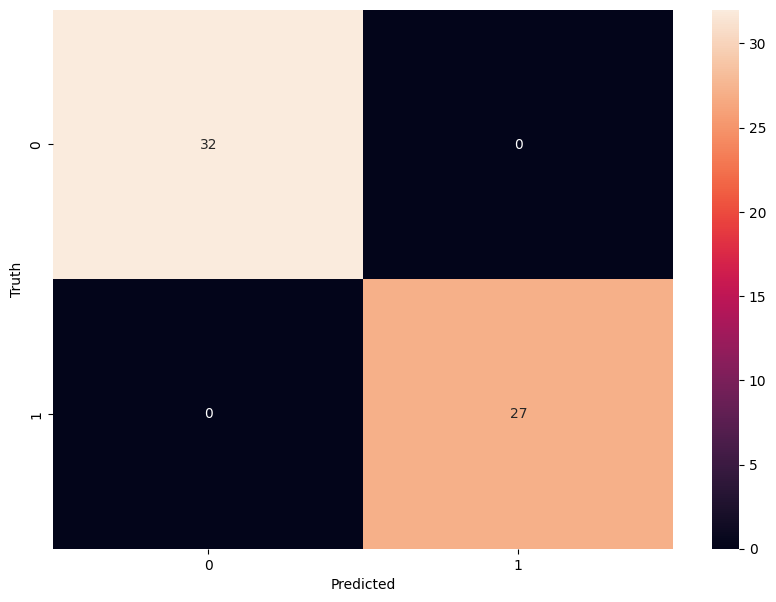

In [ ]:
cm = confusion_matrix(y_test, y_pred_final)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("CM_"+model_name+'.png')



In [ ]:
# plot the roc curve for the model
from matplotlib import pyplot
from sklearn.metrics import roc_curve
plt.figure(figsize=(30,15))
# calculate roc curves


# plot the roc curve for the model


     pyplot.plot(lr_fpr[i], lr_tpr[i], marker='.',linestyle='--', color='red'), label="ROC curve for fold "+str(i+1)+" (AUC = "+ str(lst_roc_stratified[i]) + ")")




# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
plt.title("Area under a receiver operating characteristic curve")

# show the plot
plt.savefig(model_name+'_S_auc_split_no_'+ str(split)+'(500).png')

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:

# Save the entire model as a `.keras` zip archive.
model.save('my_model.keras')

In [ ]:
new_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                690       
                                                                 
 dense_1 (Dense)             (None, 40)                1240      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2351 (9.18 KB)
Trainable params: 2351 (9.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_final)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred_final)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_final)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,  y_pred_final)
print('ROC AUC: %f' % auc)
#Cohen's kappa
kappa=cohen_kappa_score(y_test,  y_pred_final)
print('Cohen Kappa: %f' % kappa)
print(" ")

Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
ROC AUC: 1.000000
Cohen Kappa: 1.000000
 


In [ ]:
import pickle
pickle.dump(model, open("model_"+model_name+".pkl", "wb"))